## Converted Customer Feature Analysis

#### Data Cleaning

In [21]:
import pandas as pd
import numpy as np

df=pd.DataFrame(pd.read_csv('lead source grouped.csv'))
df.head()

,Lead ID,Created Date,Weekdays,Lead Source,SEO Form,Lead Status
0,00Q3400001tChd8,1/24/17,Tue,SEO,NaN,Qualified (converted)
1,00Q3400001vU8ow,5/19/17,Fri,NaN,NaN,Qualified (converted)
2,00Q3400001vUJRs,5/22/17,Mon,SEO,NaN,Qualified (converted)
3,00Q3400001wCznI,6/9/17,Fri,SEO,Advisory,Qualified (converted)
4,00Q3400001wrA3D,7/20/17,Thu,SEO,Advisory,Executive Seeking Opportunity


In [22]:
df['Qualified']= np.where(df["Lead Status"]=='Qualified (converted)',1,0)

In [23]:
import re
Month = []
for d in df['Created Date']:
    m=re.match('(.+?)/', d)
    Month.append(m.group(1))
df['Month'] = Month

In [24]:
reg=df.dropna(subset=['Lead Source']).reset_index(drop='True')

#### Data Investigation 

In [25]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

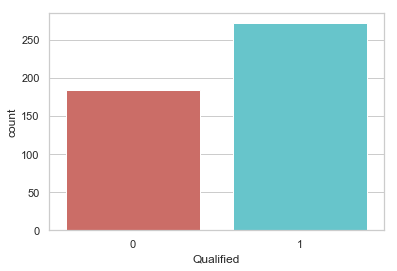

In [26]:
#reg['Qualified'].value_counts()
sns.countplot(x='Qualified', data=reg, palette='hls')
plt.show()

In [27]:
count_no_qualified = len(reg[reg['Qualified']==0])
count_qualified = len(reg[reg['Qualified']==1])
pct_of_no_qua = count_no_qualified/(count_no_qualified+count_qualified)
print("percentage of no qualified is", pct_of_no_qua*100)
pct_of_qua = count_qualified/(count_no_qualified+count_qualified)
print("percentage of qualified", pct_of_qua*100)

percentage of no qualified is 40.35087719298245
percentage of qualified 59.64912280701754


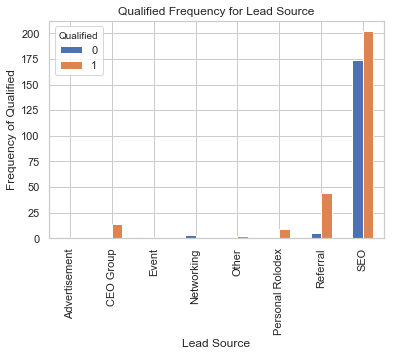

In [28]:
%matplotlib inline
pd.crosstab(reg['Lead Source'],reg['Qualified']).plot(kind='bar')
plt.title('Qualified Frequency for Lead Source')
plt.xlabel('Lead Source')
plt.ylabel('Frequency of Qualified')

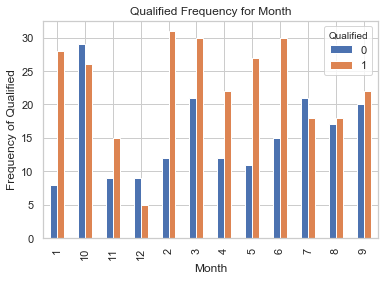

In [29]:
%matplotlib inline
pd.crosstab(reg['Month'],reg['Qualified']).plot(kind='bar')
plt.title('Qualified Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Qualified')

#### Create Dummy Variables

In [30]:
reg.head()

,Lead ID,Created Date,Weekdays,Lead Source,SEO Form,Lead Status,Qualified,Month
0,00Q3400001tChd8,1/24/17,Tue,SEO,NaN,Qualified (converted),1,1
1,00Q3400001vUJRs,5/22/17,Mon,SEO,NaN,Qualified (converted),1,5
2,00Q3400001wCznI,6/9/17,Fri,SEO,Advisory,Qualified (converted),1,6
3,00Q3400001wrA3D,7/20/17,Thu,SEO,Advisory,Executive Seeking Opportunity,0,7
4,00Q3400001x9pSX,8/1/17,Tue,SEO,Contact Us,Qualified (converted),1,8


In [14]:
str(reg.Month)
vars=['Month','Weekdays','Lead Source']
for var in vars:
    l='var'+'_'+var
    l = pd.get_dummies(reg[var], prefix=var)
    data=reg.join(l)
    reg=data
vars=['Month','Weekdays','Lead Source']
data_vars=reg.columns.values.tolist()
to_keep=[i for i in data_vars if i not in vars]
reg_final=reg[to_keep]

In [15]:
reg_final.columns.values

array(['Lead ID', 'Created Date', 'SEO Form', 'Lead Status', 'Qualified',
       'Month_1', 'Month_10', 'Month_11', 'Month_12', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Weekdays_Fri', 'Weekdays_Mon', 'Weekdays_Sat',
       'Weekdays_Sun', 'Weekdays_Thu', 'Weekdays_Tue', 'Weekdays_Wed',
       'Lead Source_Advertisement', 'Lead Source_CEO Group',
       'Lead Source_Event', 'Lead Source_Networking', 'Lead Source_Other',
       'Lead Source_Personal Rolodex', 'Lead Source_Referral',
       'Lead Source_SEO'], dtype=object)

from sklearn.model_selection import train_test_split
train, test = train_test_split(reg, test_size=0.2)
train['Qualified'].value_counts()

test['Qualified'].value_counts()

#### Logistic Regressino

In [16]:
import statsmodels.api as sm
variables=['Month_1', 'Month_10', 'Month_11', 'Month_12', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9']
y=reg_final.Qualified.copy()
X = reg_final[variables]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

/Users/yanghaoying/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.648976
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.038   
Dependent Variable: Qualified        AIC:              615.8663
Date:               2019-02-25 23:33 BIC:              665.3362
No. Observations:   456              Log-Likelihood:   -295.93 
Df Model:           11               LL-Null:          -307.53 
Df Residuals:       444              LLR p-value:      0.016592
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
----------------------------------------------------------------
Month_1       1.2528    0.4009   3.1249  0.0018   0.4670  2.0385
Month_10     -0.1092    0.2701  -0.4043  0.6860  -0.6386  0.4202
Month_11      0.5108  

In [18]:
import statsmodels.api as sm
variables=['Weekdays_Fri', 'Weekdays_Mon', 'Weekdays_Sat',
       'Weekdays_Sun', 'Weekdays_Thu', 'Weekdays_Tue', 'Weekdays_Wed']
y=reg_final.Qualified.copy()
X = reg_final[variables]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.661194
         Iterations 4
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.020   
Dependent Variable: Qualified        AIC:              617.0087
Date:               2019-02-25 23:34 BIC:              645.8661
No. Observations:   456              Log-Likelihood:   -301.50 
Df Model:           6                LL-Null:          -307.53 
Df Residuals:       449              LLR p-value:      0.060817
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     4.0000                                     
---------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
---------------------------------------------------------------
Weekdays_Fri      0.6190   0.2344  2.6409 0.0083  0.1596 1.0785
Weekdays_Mon      0.4520   0.2162  2.0903 0.0366  0.0282 0.8758
Weekdays_Sat     -0.5596   

In [20]:
import statsmodels.api as sm
variables=['Lead Source_Referral',
       'Lead Source_SEO','Month_1','Month_2','Month_5','Month_6',
           'Weekdays_Fri','Weekdays_Tue','Weekdays_Wed','Weekdays_Mon']
y= reg_final.Qualified.copy()
X = reg_final[variables]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.614360
         Iterations 6
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.089     
Dependent Variable:  Qualified         AIC:               580.2961  
Date:                2019-02-26 09:06  BIC:               621.5211  
No. Observations:    456               Log-Likelihood:    -280.15   
Df Model:            9                 LL-Null:           -307.53   
Df Residuals:        446               LLR p-value:       1.3504e-08
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Lead Source_Referral  1.4137   0.5038  2.8060 0.0050  0.4262  2.4012
Lead Source_SEO      -0.6134

In [158]:
import statsmodels.api as sm
variables=['Lead Source_Referral',
       'Lead Source_SEO','Month_1','Month_2','Month_5','Month_6',
           'Weekdays_Fri','Weekdays_Tue','Weekdays_Wed',]
y= reg_final.Qualified.copy()
X = reg_final[variables]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.617546
         Iterations 6
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.084     
Dependent Variable:  Qualified         AIC:               581.2020  
Date:                2019-02-17 16:19  BIC:               618.3044  
No. Observations:    456               Log-Likelihood:    -281.60   
Df Model:            8                 LL-Null:           -307.53   
Df Residuals:        447               LLR p-value:       1.7921e-08
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Lead Source_Referral  1.6174   0.4893  3.3057 0.0009  0.6584  2.5763
Lead Source_SEO      -0.4433

#### Results and ROC Curve

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/yanghaoying/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [168]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.62


In [169]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[19 11]
 [24 38]]


In [170]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.63      0.52        30
           1       0.78      0.61      0.68        62

   micro avg       0.62      0.62      0.62        92
   macro avg       0.61      0.62      0.60        92
weighted avg       0.67      0.62      0.63        92



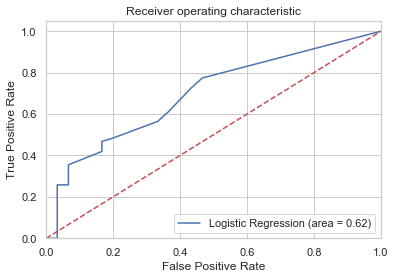

In [171]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()